In [1]:
import cobra
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [2]:
model = cobra.io.read_sbml_model("Arnold2014_WT_Cntl_Loopless_Cyclic.xml")
samples_control = pd.read_csv('ResultsCHRR_ANmodel_Col0_Control_Loopless_Cyclic_New_100000.csv',header=None)
samples_control_D0 = pd.read_csv('ResultsCHRR_ANmodel_Col0_Control_Loopless_Cyclic_D0_100000.csv',header=None)
samples_fum_control = pd.read_csv('ResultsCHRR_ANmodel_Fum2_Control_Loopless_Cyclic_New_100000.csv',header=None)
samples_fum_control_D0 = pd.read_csv('ResultsCHRR_ANmodel_Fum2_Control_Loopless_Cyclic_D0_100000.csv',header=None)
samples_control_Nmin = pd.read_csv('ResultsCHRR_ANmodel_Col0_Control_Loopless_Cyclic_New_Nmin_100000.csv',header=None)
samples_fum_control_Nmin = pd.read_csv('ResultsCHRR_ANmodel_Fum2_Control_Loopless_Cyclic_New_Nmin_100000.csv',header=None)
samples_cold = pd.read_csv('ResultsCHRR_ANmodel_Col0_Cold_Loopless_Cyclic_New_100000.csv',header=None)
samples_fum_cold = pd.read_csv('ResultsCHRR_ANmodel_Fum2_Cold_Loopless_Cyclic_New_100000.csv',header=None)

cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '2*(ATCG00020 and ATCG00680 and ATCG00280 and ATCG00270 and ATCG00580 and ATCG00570 and ATCG00710 and ATCG00080 and ATCG00550 and ATCG00070 and ATCG00560 and ATCG00220 and ATCG00700 and (AT5G66570 or AT3G50820) and AT1G06680 and (AT4G21280 or AT4G05180) and AT1G79040 and AT1G44575 and ATCG00690 and AT3G21055 and AT2G30570 and AT2G06520 and AT1G67740 and ATCG00300)' for <Reaction PSII_h at 0x7fade0b83890>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '2*(ATCG00540 and ATCG00720 and AT4G03280 and ATCG00730 and ATCG00600 and ATCG00590 and AT2G26500 and ATCG00210)' for <Reaction Cytb6f_h at 0x7faddfb9cb10>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '8*(ATCG00490) and 8*(AT5G38430 or AT5G38420 or AT1G67090 or AT5G38410)' for <Reaction RBC_h at 0x7fada0bccdd0>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '4*(AT3G26650 or AT1G12900) or (2*(AT3G26650 or 

In [5]:
# Generate sample distribution in PDF file for all model reactions
totaldiff = []
pdf = matplotlib.backends.backend_pdf.PdfPages("AllComparisons_Loopless_Cyclic.pdf") 
for i in range(samples_control.shape[1]): 
    col0 = pd.Series.tolist(samples_control.iloc[:,i])
    col0_cold = pd.Series.tolist(samples_cold.iloc[:,i])
    fum2 = pd.Series.tolist(samples_fum_control.iloc[:,i])
    fum2_cold = pd.Series.tolist(samples_fum_cold.iloc[:,i])
    totaldiff.append(i)
    bns = 50
    weights_x = np.ones_like(col0)/float(len(col0))
    weights_y = np.ones_like(col0_cold)/float(len(col0_cold))
    weights_x_fum = np.ones_like(fum2)/float(len(fum2))
    weights_y_fum = np.ones_like(fum2_cold)/float(len(fum2_cold))
    yn, ybins, ypatches = plt.hist(fum2_cold, bins=bns, alpha=0.6, weights=weights_y, color = "cyan", lw=0)
    xn, xbins, xpatches = plt.hist(col0, bins=bns, alpha=0.6, weights=weights_x, color = "red", lw=0)
    yn, ybins, ypatches = plt.hist(col0_cold, bins=bns, alpha=0.6, weights=weights_y, color = "blue", lw=0)
    xn, xbins, xpatches = plt.hist(fum2, bins=bns, alpha=0.6, weights=weights_x, color = "pink", lw=0)
    plt.xlabel('Flux')
    plt.ylabel('Frequency')
    plt.ylim((0,0.05))
    gs = model.reactions[i].genes
    gene_names = []
    plt.title('{} : {} \n{}'.format(i,model.reactions[i].reaction,gene_names),fontsize=6)
    pdf.savefig()
    plt.close()
pdf.close()
print(len(totaldiff))
print(samples_control.shape)

553
(100000, 553)


In [8]:
# Generate sample distribution in PDF file for all model reactions
totaldiff = []
pdf = matplotlib.backends.backend_pdf.PdfPages("AllComparisons_Loopless_Cyclic_Nmin.pdf") 
for i in range(samples_control.shape[1]): 
    col0 = pd.Series.tolist(samples_control_D0.iloc[:,i])
    col0_cold = pd.Series.tolist(samples_control_Nmin.iloc[:,i])
    fum2 = pd.Series.tolist(samples_fum_control_D0.iloc[:,i])
    fum2_cold = pd.Series.tolist(samples_fum_control_Nmin.iloc[:,i])
    totaldiff.append(i)
    bns = 50
    weights_x = np.ones_like(col0)/float(len(col0))
    weights_y = np.ones_like(col0_cold)/float(len(col0_cold))
    weights_x_fum = np.ones_like(fum2)/float(len(fum2))
    weights_y_fum = np.ones_like(fum2_cold)/float(len(fum2_cold))
    yn, ybins, ypatches = plt.hist(fum2_cold, bins=bns, alpha=0.3, weights=weights_y, color = "lightgreen", lw=0)
    xn, xbins, xpatches = plt.hist(col0, bins=bns, alpha=0.6, weights=weights_x, color = "blue", lw=0)
    yn, ybins, ypatches = plt.hist(col0_cold, bins=bns, alpha=0.6, weights=weights_y, color = "forestgreen", lw=0)
    xn, xbins, xpatches = plt.hist(fum2, bins=bns, alpha=0.6, weights=weights_x, color = "cyan", lw=0)
    plt.xlabel('Flux')
    plt.ylabel('Frequency')
    plt.ylim((0,0.05))
    gs = model.reactions[i].genes
    gene_names = []
    plt.title('{} : {} \n{}'.format(i,model.reactions[i].reaction,gene_names),fontsize=6)
    pdf.savefig()
    plt.close()
pdf.close()
print(len(totaldiff))
print(samples_control.shape)

553
(100000, 553)


In [18]:
def single_fig(i,xmin,xmax,col,fum):
    col0 = [round(x,3) for x in pd.Series.tolist(col.iloc[:,i])]
    fum2 = [round(x,3) for x in pd.Series.tolist(fum.iloc[:,i])]
    bns = 50
    weights_x = np.ones_like(col0)/float(len(col0))
    weights_y = np.ones_like(fum2)/float(len(fum2))
    xn, xbins, xpatches = axis1.hist(col0,bins=bns,alpha=1,weights=weights_x,color="black",lw=0)
    if round(np.std(fum2),2) == 0.0:
        plt.axvline(x=np.mean(fum2),color="gray",lw=3)
    else:
        yn, ybins, ypatches = axis1.hist(fum2, bins=bns, alpha=0.6, weights=weights_y, color = "gray", lw=0)
    plt.xlabel('Flux',fontsize=30)
    plt.ylabel('Frequency',fontsize=30)
    #plt.title('{}'.format(model.reactions[i].reaction),color="black",fontsize=12,y=0.9)
    plt.ylim((0,0.075))
    plt.xlim((xmin,xmax))
    plt.tick_params(labelsize=30)

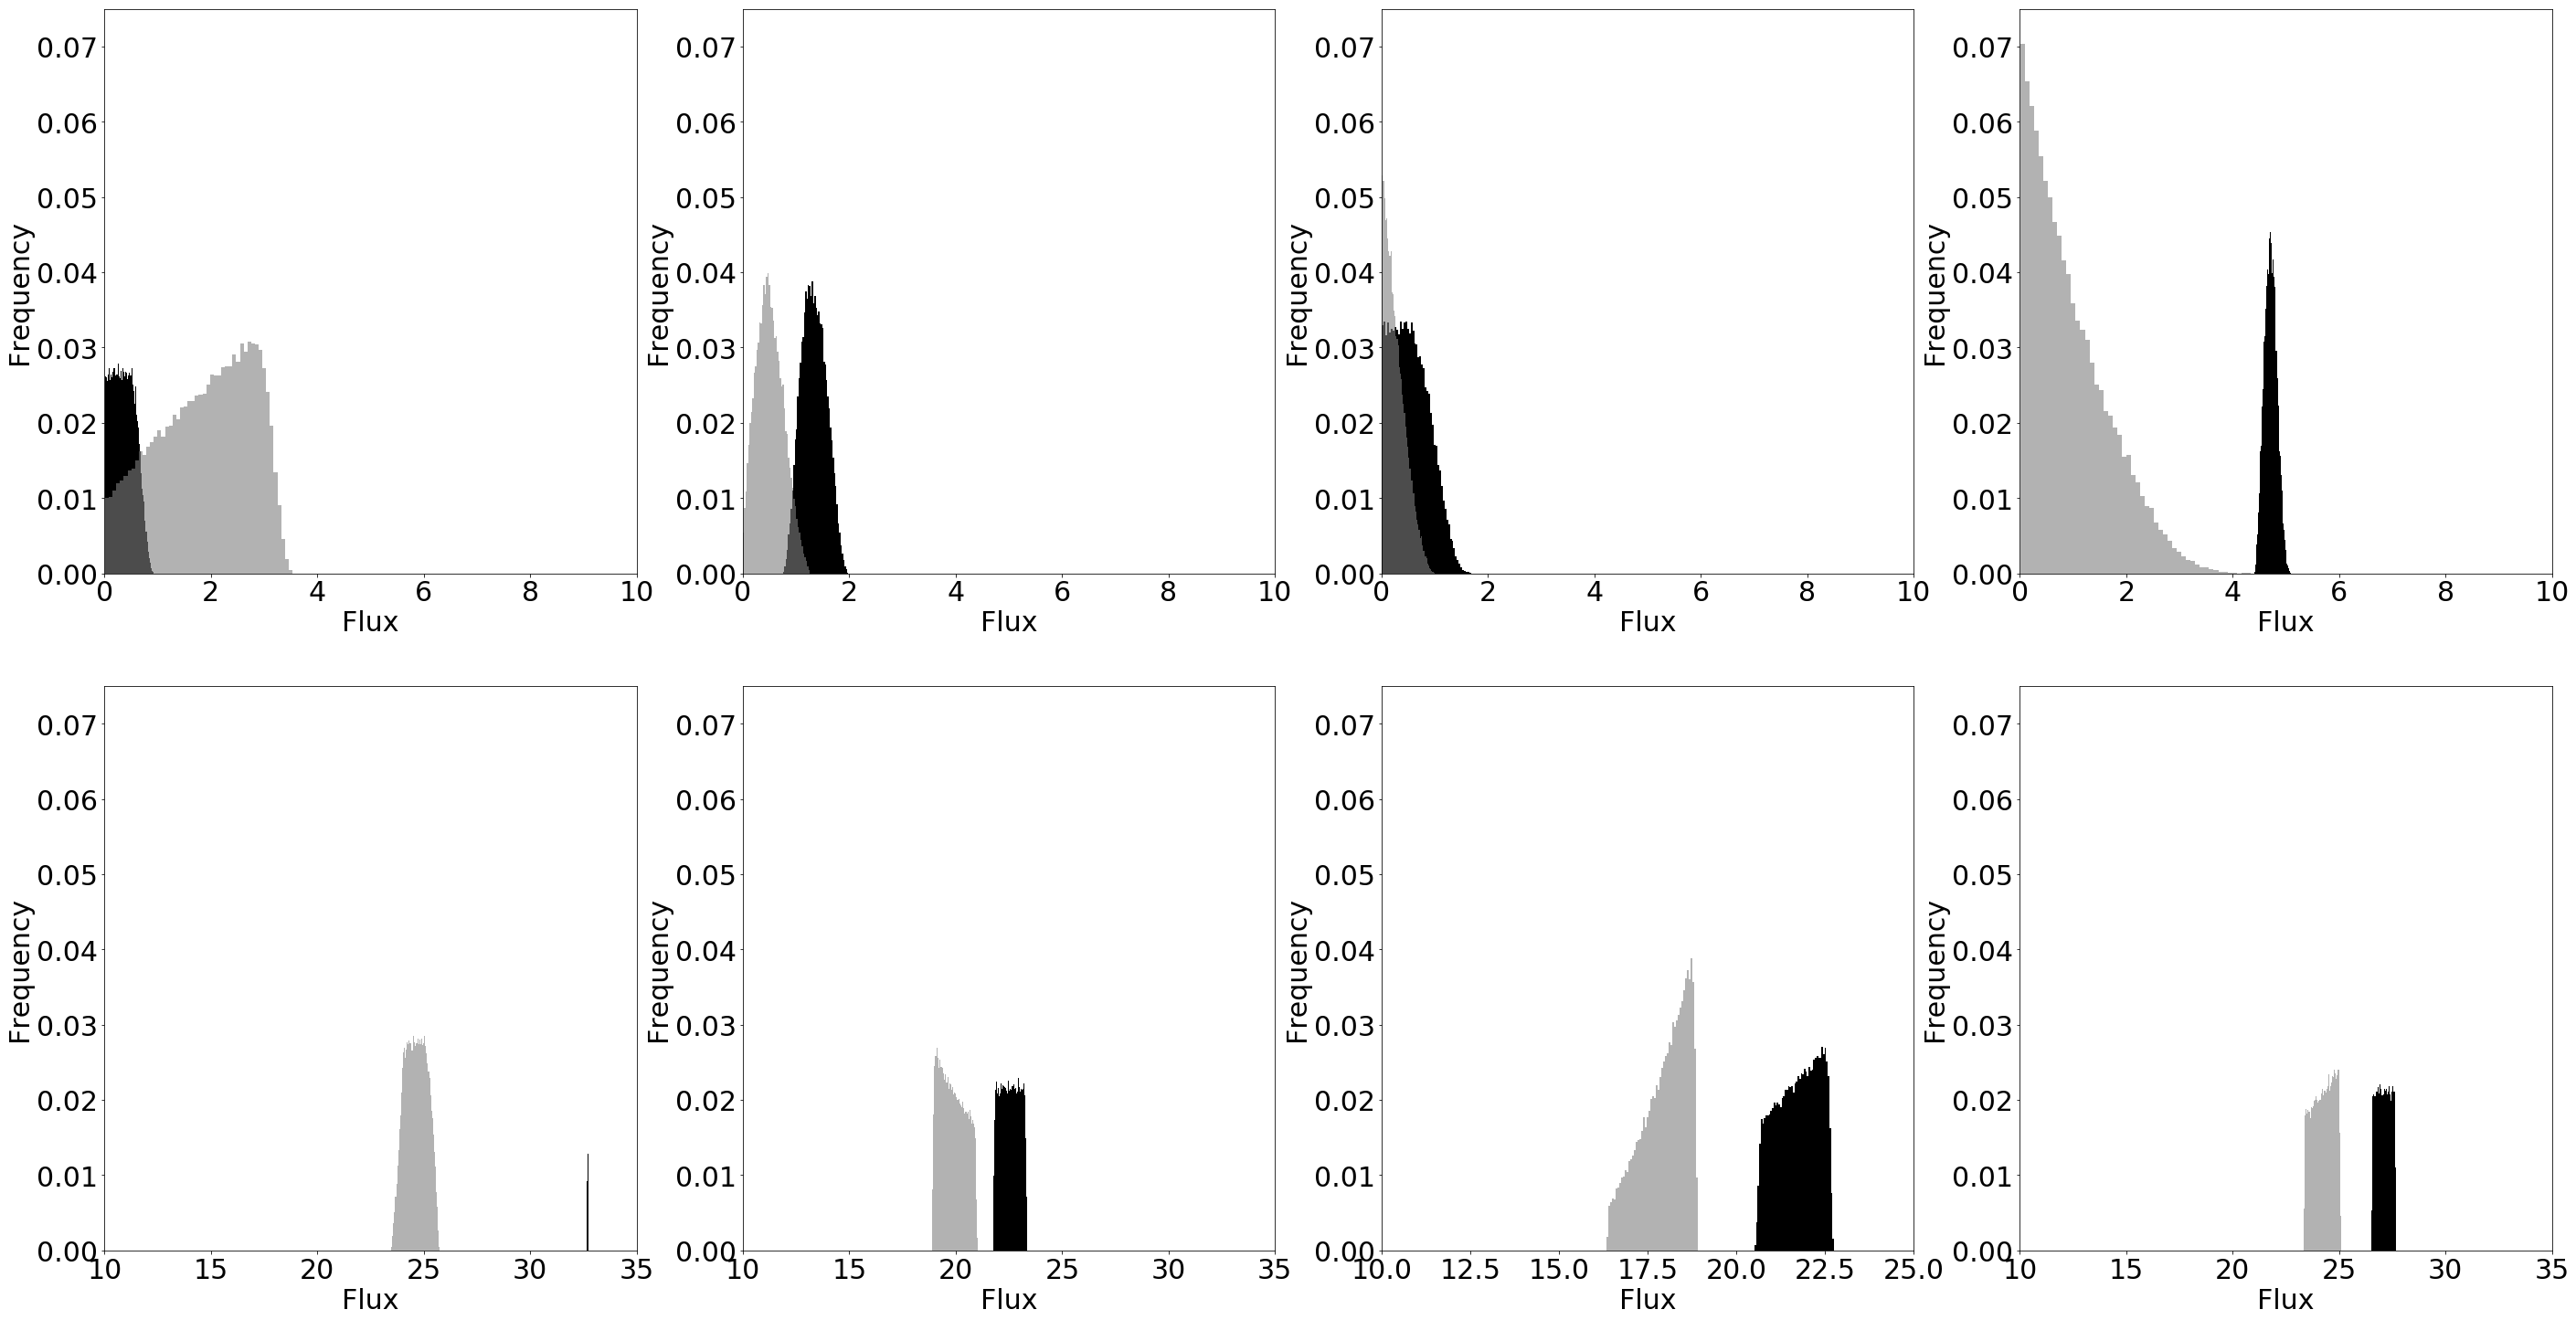

In [20]:
# Plotting the TPT reactions 
fig = plt.figure(figsize=(48,25))
axis1 = fig.add_subplot(241)
single_fig(329,0,10,samples_control,samples_fum_control) 
axis1 = fig.add_subplot(245)
single_fig(330,10,35,samples_control,samples_fum_control)
axis1 = fig.add_subplot(242)
single_fig(329,0,10,samples_control_D0,samples_fum_control_D0) 
axis1 = fig.add_subplot(246)
single_fig(330,10,35,samples_control_D0,samples_fum_control_D0)
axis1 = fig.add_subplot(243)
single_fig(329,0,10,samples_cold,samples_fum_cold) 
axis1 = fig.add_subplot(247)
single_fig(330,10,25,samples_cold,samples_fum_cold)
axis1 = fig.add_subplot(244)
single_fig(329,0,10,samples_control_Nmin,samples_fum_control_Nmin) 
axis1 = fig.add_subplot(248)
single_fig(330,10,35,samples_control_Nmin,samples_fum_control_Nmin)
fig.savefig('Model_Figure1.png')

In [6]:
def single_fig(i,xmin,xmax,col,fum,F=1):
    col0 = [round(x,3)*F for x in pd.Series.tolist(col.iloc[:,i])]
    fum2 = [round(x,3)*F for x in pd.Series.tolist(fum.iloc[:,i])]
    bns = 50
    weights_x = np.ones_like(col0)/float(len(col0))
    weights_y = np.ones_like(fum2)/float(len(fum2))
    xn, xbins, xpatches = axis1.hist(col0,bins=bns,alpha=1,weights=weights_x,color="black",lw=0)
    if round(np.std(fum2),2) == 0.0:
        plt.axvline(x=np.mean(fum2),color="gray",lw=3)
    else:
        yn, ybins, ypatches = axis1.hist(fum2, bins=bns, alpha=0.6, weights=weights_y, color = "gray", lw=0)
    plt.xlabel('Flux',fontsize=50)
    plt.ylabel('Frequency',fontsize=50)
    #plt.title('{}'.format(model.reactions[i].reaction),color="black",fontsize=12,y=0.9)
    plt.ylim((0,0.075))
    plt.xlim((xmin,xmax))
    plt.tick_params(labelsize=50)

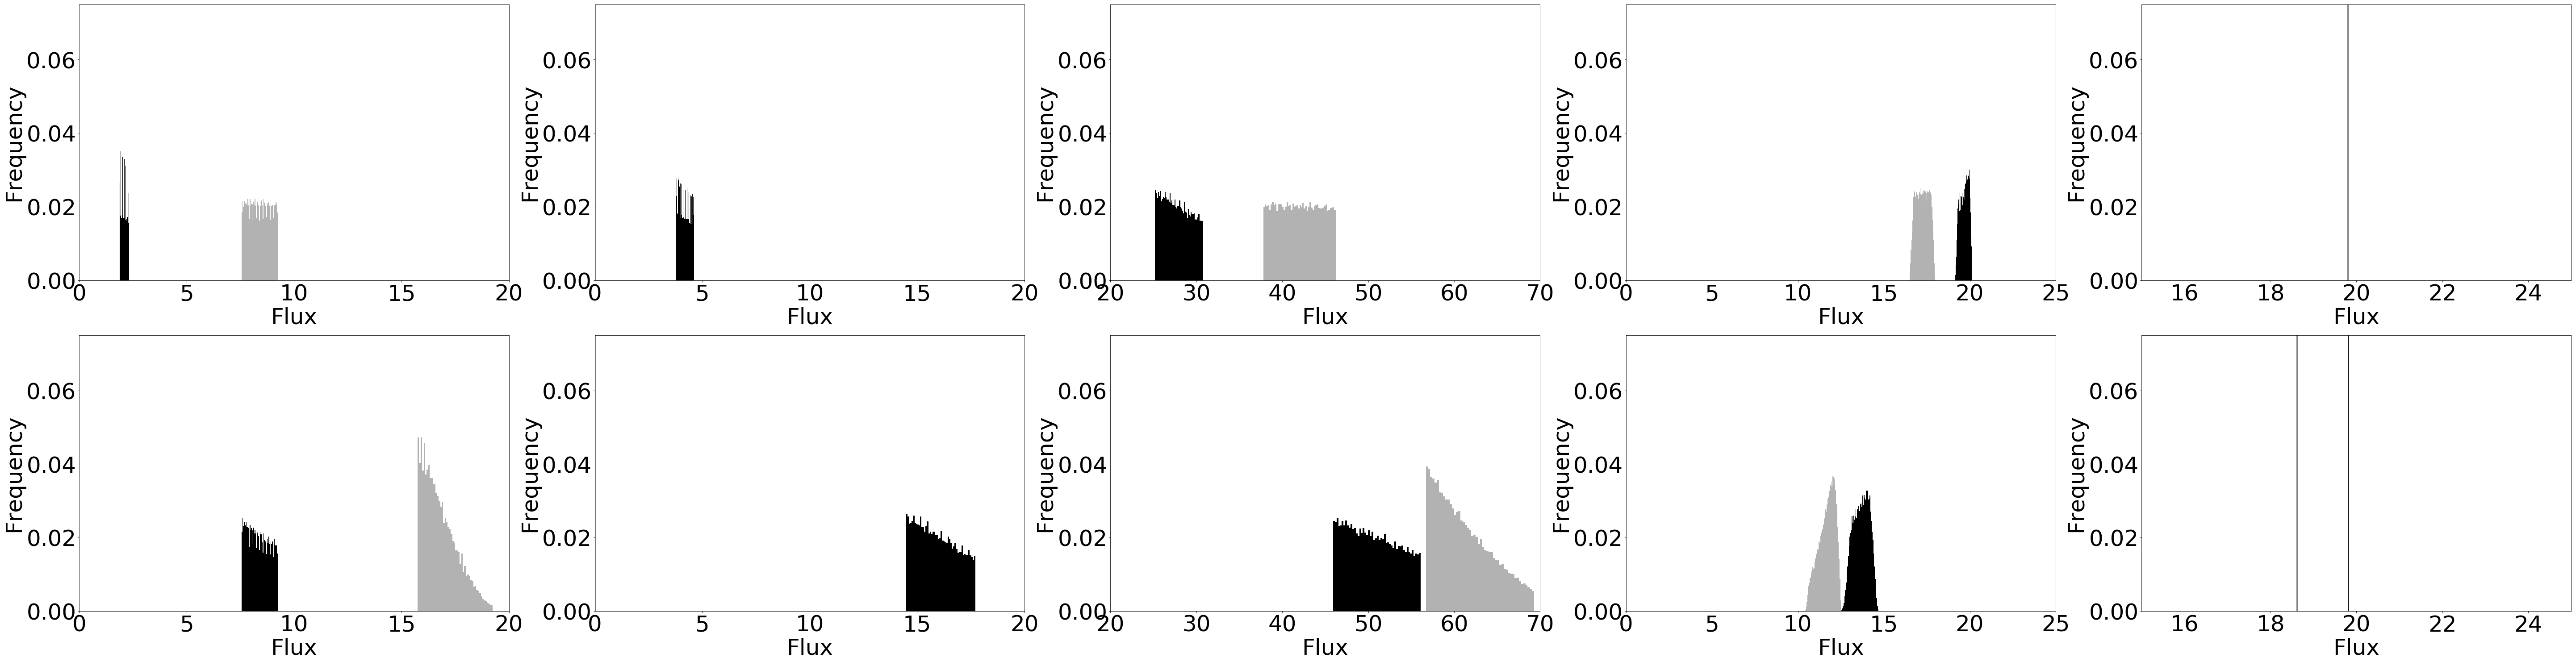

In [7]:
fig = plt.figure(figsize=(100,25))

axis1 = fig.add_subplot(2,5,1) # Malate
single_fig(550,0,20,samples_control,samples_fum_control,4)
axis1 = fig.add_subplot(252) # Fumarate 
single_fig(551,0,20,samples_control,samples_fum_control,4) 
axis1 = fig.add_subplot(253) # Starch
single_fig(552,20,70,samples_control,samples_fum_control,6) 
axis1 = fig.add_subplot(254) # Export
single_fig(537,0,25,samples_control,samples_fum_control) 
axis1 = fig.add_subplot(255) # Respiration
single_fig(390,15,25,samples_control,samples_fum_control) 

axis1 = fig.add_subplot(256) # Malate
single_fig(550,0,20,samples_cold,samples_fum_cold,4) 
axis1 = fig.add_subplot(257) # Fumarate 
single_fig(551,0,20,samples_cold,samples_fum_cold,4) 
axis1 = fig.add_subplot(258) # Starch
single_fig(552,20,70,samples_cold,samples_fum_cold,6) 
axis1 = fig.add_subplot(259) # Export 
single_fig(537,0,25,samples_cold,samples_fum_cold) 
axis1 = fig.add_subplot(2,5,10) # Respiration
single_fig(390,15,25,samples_cold,samples_fum_cold) 

fig.savefig('SI_Figure1.png')